In [1]:
print("Hello")

Hello


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("CarPrice_Assignment.csv")

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [6]:
# new_df=df.drop(["car_ID","symboling","carheight","stroke","compressionratio","peakrpm"],axis=1)

In [7]:
new_df=df

In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
new_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
new_df.isna()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
new_df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
new_df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [14]:
le=LabelEncoder()

In [15]:
new_df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [16]:
new_df['CarName_enc']=le.fit_transform(new_df['CarName'])

In [17]:
new_df['CarName_enc']

0        2
1        3
2        1
3        4
4        5
      ... 
200    139
201    138
202    140
203    142
204    143
Name: CarName_enc, Length: 205, dtype: int32

In [18]:
new_df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [19]:
new_df['fueltype_enc']=le.fit_transform(new_df['fueltype'])

In [20]:
new_df['fueltype_enc']

0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    1
202    1
203    0
204    1
Name: fueltype_enc, Length: 205, dtype: int32

In [21]:
new_df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [22]:
new_df['aspiration_enc']=le.fit_transform(new_df['aspiration'])

In [23]:
new_df['aspiration_enc']

0      0
1      0
2      0
3      0
4      0
      ..
200    0
201    1
202    0
203    1
204    1
Name: aspiration_enc, Length: 205, dtype: int32

In [24]:
new_df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [25]:
new_df['doornumber_enc']=le.fit_transform(new_df['doornumber'])

In [26]:
new_df['doornumber_enc']

0      1
1      1
2      1
3      0
4      0
      ..
200    0
201    0
202    0
203    0
204    0
Name: doornumber_enc, Length: 205, dtype: int32

In [27]:
onec=OneHotEncoder(sparse=False,drop='first')

In [28]:
new_df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [29]:
carbody_enc=pd.DataFrame(onec.fit_transform(new_df[['carbody']]))

In [30]:
carbody_enc

,0,1,2,3
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
200,0.0,0.0,1.0,0.0
201,0.0,0.0,1.0,0.0
202,0.0,0.0,1.0,0.0
203,0.0,0.0,1.0,0.0


In [31]:
new_df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [32]:
new_df['drivewheel_enc']=le.fit_transform(new_df['drivewheel'])

In [33]:
new_df['drivewheel_enc']

0      2
1      2
2      2
3      1
4      0
      ..
200    2
201    2
202    2
203    2
204    2
Name: drivewheel_enc, Length: 205, dtype: int32

In [34]:
new_df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [35]:
new_df['enginelocation_enc']=le.fit_transform(new_df['enginelocation'])

In [36]:
new_df['enginelocation_enc']

0      0
1      0
2      0
3      0
4      0
      ..
200    0
201    0
202    0
203    0
204    0
Name: enginelocation_enc, Length: 205, dtype: int32

In [37]:
new_df['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [38]:
enginetype_enc=pd.DataFrame(onec.fit_transform(new_df[['enginetype']]))

In [39]:
enginetype_enc

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
200,0.0,0.0,1.0,0.0,0.0,0.0
201,0.0,0.0,1.0,0.0,0.0,0.0
202,0.0,0.0,0.0,0.0,1.0,0.0
203,0.0,0.0,1.0,0.0,0.0,0.0


In [40]:
new_df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [41]:
cylindernumber_enc=pd.DataFrame(onec.fit_transform(new_df[['cylindernumber']]))

In [42]:
cylindernumber_enc

,0,1,2,3,4,5
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
200,0.0,1.0,0.0,0.0,0.0,0.0
201,0.0,1.0,0.0,0.0,0.0,0.0
202,0.0,0.0,1.0,0.0,0.0,0.0
203,0.0,0.0,1.0,0.0,0.0,0.0


In [43]:
new_df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [44]:
fuelsystem_enc=pd.DataFrame(onec.fit_transform(new_df[['fuelsystem']]))

In [45]:
fuelsystem_enc

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
200,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [46]:
new_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,peakrpm,citympg,highwaympg,price,CarName_enc,fueltype_enc,aspiration_enc,doornumber_enc,drivewheel_enc,enginelocation_enc
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,5000,21,27,13495.0,2,1,0,1,2,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,5000,21,27,16500.0,3,1,0,1,2,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,5000,19,26,16500.0,1,1,0,1,2,0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,5500,24,30,13950.0,4,1,0,0,1,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,5500,18,22,17450.0,5,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,5400,23,28,16845.0,139,1,0,0,2,0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,5300,19,25,19045.0,138,1,1,0,2,0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,5500,18,23,21485.0,140,1,0,0,2,0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,4800,26,27,22470.0,142,0,1,0,2,0


In [47]:
final_df=pd.concat([new_df,carbody_enc,enginetype_enc,cylindernumber_enc,fuelsystem_enc])

In [48]:
final_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,doornumber_enc,drivewheel_enc,enginelocation_enc,0,1,2,3,4,5,6
0,1.0,3.0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,3.0,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,1.0,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2.0,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2.0,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [49]:
final_df=final_df.drop(['CarName','fueltype','fuelsystem','aspiration','doornumber','drivewheel','enginelocation','carbody','enginetype','cylindernumber'],axis=1)

In [50]:
final_df

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,doornumber_enc,drivewheel_enc,enginelocation_enc,0,1,2,3,4,5,6
0,1.0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,1.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [51]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025 entries, 0 to 204
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_ID              205 non-null    float64
 1   symboling           205 non-null    float64
 2   wheelbase           205 non-null    float64
 3   carlength           205 non-null    float64
 4   carwidth            205 non-null    float64
 5   carheight           205 non-null    float64
 6   curbweight          205 non-null    float64
 7   enginesize          205 non-null    float64
 8   boreratio           205 non-null    float64
 9   stroke              205 non-null    float64
 10  compressionratio    205 non-null    float64
 11  horsepower          205 non-null    float64
 12  peakrpm             205 non-null    float64
 13  citympg             205 non-null    float64
 14  highwaympg          205 non-null    float64
 15  price               205 non-null    float64
 16  CarName

In [52]:
final_df.isnull().sum()

car_ID                820
symboling             820
wheelbase             820
carlength             820
carwidth              820
carheight             820
curbweight            820
enginesize            820
boreratio             820
stroke                820
compressionratio      820
horsepower            820
peakrpm               820
citympg               820
highwaympg            820
price                 820
CarName_enc           820
fueltype_enc          820
aspiration_enc        820
doornumber_enc        820
drivewheel_enc        820
enginelocation_enc    820
0                     205
1                     205
2                     205
3                     205
4                     410
5                     410
6                     820
dtype: int64

In [53]:
final_df = final_df.fillna(value=0)

In [54]:
final_df.sample(50)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,doornumber_enc,drivewheel_enc,enginelocation_enc,0,1,2,3,4,5,6
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
46,47.0,2.0,96.0,172.6,65.2,51.4,2734.0,119.0,3.43,3.23,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
final_df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,doornumber_enc,drivewheel_enc,enginelocation_enc,0,1,2,3,4,5,6
car_ID,1.000000,0.362941,0.844188,0.846021,0.841843,0.847298,0.829072,0.783818,0.850628,0.827271,...,0.441398,0.773957,0.118831,-0.127313,-0.235140,-0.262978,-0.086957,-0.144372,-0.054633,-0.013146
symboling,0.362941,1.000000,0.482735,0.489100,0.507280,0.490704,0.458812,0.452333,0.502684,0.511117,...,0.765915,0.451281,0.236863,-0.077907,-0.143890,-0.160925,-0.053212,-0.088346,-0.033431,-0.008045
wheelbase,0.844188,0.482735,1.000000,0.999269,0.998996,0.998440,0.984566,0.950199,0.996611,0.993153,...,0.595272,0.917015,0.095443,-0.150968,-0.278829,-0.311839,-0.103114,-0.171197,-0.064783,-0.015589
carlength,0.846021,0.489100,0.999269,1.000000,0.998638,0.997570,0.987436,0.954676,0.997131,0.992276,...,0.593942,0.919284,0.104027,-0.150846,-0.278603,-0.311587,-0.103030,-0.171058,-0.064731,-0.015576
carwidth,0.841843,0.507280,0.998996,0.998638,1.000000,0.998572,0.981468,0.947639,0.997087,0.994332,...,0.614203,0.912528,0.106423,-0.151217,-0.279289,-0.312354,-0.103284,-0.171479,-0.064890,-0.015615
carheight,0.847298,0.490704,0.998440,0.997570,0.998572,1.000000,0.977206,0.939051,0.995414,0.992702,...,0.597770,0.904306,0.102870,-0.151122,-0.279114,-0.312158,-0.103219,-0.171372,-0.064849,-0.015605
curbweight,0.829072,0.458812,0.984566,0.987436,0.981468,0.977206,1.000000,0.980519,0.984135,0.973556,...,0.570781,0.937343,0.116783,-0.147555,-0.272525,-0.304789,-0.100782,-0.167326,-0.063319,-0.015237
enginesize,0.783818,0.452333,0.950199,0.954676,0.947639,0.939051,0.980519,1.000000,0.953374,0.941172,...,0.577119,0.927025,0.169005,-0.142100,-0.262449,-0.293521,-0.097056,-0.161140,-0.060978,-0.014673
boreratio,0.850628,0.502684,0.996611,0.997131,0.997087,0.995414,0.984135,0.953374,1.000000,0.989672,...,0.609518,0.920623,0.124536,-0.150698,-0.278330,-0.311281,-0.102929,-0.170890,-0.064667,-0.015561
stroke,0.827271,0.511117,0.993153,0.992276,0.994332,0.992702,0.973556,0.941172,0.989672,1.000000,...,0.617883,0.903947,0.093036,-0.150451,-0.277874,-0.310771,-0.102760,-0.170610,-0.064561,-0.015536


In [56]:
final_df.skew()

car_ID                 2.371452
symboling              2.774244
wheelbase              1.520166
carlength              1.525601
carwidth               1.507233
carheight              1.511840
curbweight             1.697112
enginesize             2.086316
boreratio              1.532725
stroke                 1.542866
compressionratio       2.410434
horsepower             2.199904
peakrpm                1.542136
citympg                1.809065
highwaympg             1.731240
price                  3.093122
CarName_enc            2.253344
fueltype_enc           1.663995
aspiration_enc         4.981240
doornumber_enc         2.917198
drivewheel_enc         2.083212
enginelocation_enc    18.429960
0                      3.006099
1                      1.231942
2                      0.976006
3                      4.637933
4                      2.574472
5                      7.581501
6                     32.015621
dtype: float64

In [57]:
def right_nor_left(df, col):
    
    rs = df[value].skew()
    print(rs)

    if rs > 0:
        return "positive (+ve) skewed"
    
    elif rs == 0:
        return "normal skewed"
    
    elif rs < 0:
        return "negative (-ve) skewed"
        
    

In [63]:
c=final_df.columns.tolist()

In [64]:
c

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price',
 'CarName_enc',
 'fueltype_enc',
 'aspiration_enc',
 'doornumber_enc',
 'drivewheel_enc',
 'enginelocation_enc',
 0,
 1,
 2,
 3,
 4,
 5,
 6]

In [65]:
for value in c:
    
    print(value, "->",right_nor_left(final_df,value))

2.371451820596157
car_ID -> positive (+ve) skewed
2.7742440010788343
symboling -> positive (+ve) skewed
1.5201655281599955
wheelbase -> positive (+ve) skewed
1.5256007500804671
carlength -> positive (+ve) skewed
1.5072334329303736
carwidth -> positive (+ve) skewed
1.5118401092550566
carheight -> positive (+ve) skewed
1.6971123616953512
curbweight -> positive (+ve) skewed
2.0863160553397253
enginesize -> positive (+ve) skewed
1.532724662004885
boreratio -> positive (+ve) skewed
1.542866399934684
stroke -> positive (+ve) skewed
2.410434348638894
compressionratio -> positive (+ve) skewed
2.199904447321334
horsepower -> positive (+ve) skewed
1.5421364405879632
peakrpm -> positive (+ve) skewed
1.8090654864740183
citympg -> positive (+ve) skewed
1.7312404464569469
highwaympg -> positive (+ve) skewed
3.093122207587718
price -> positive (+ve) skewed
2.2533435899652794
CarName_enc -> positive (+ve) skewed
1.6639952033817247
fueltype_enc -> positive (+ve) skewed
4.981239920088741
aspiration_enc 

In [66]:
cols = final_df.columns.tolist()

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


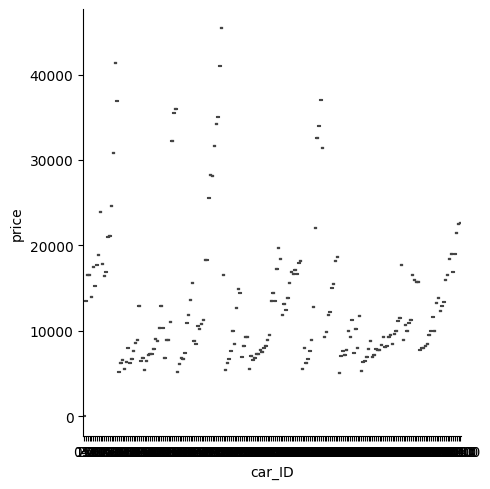

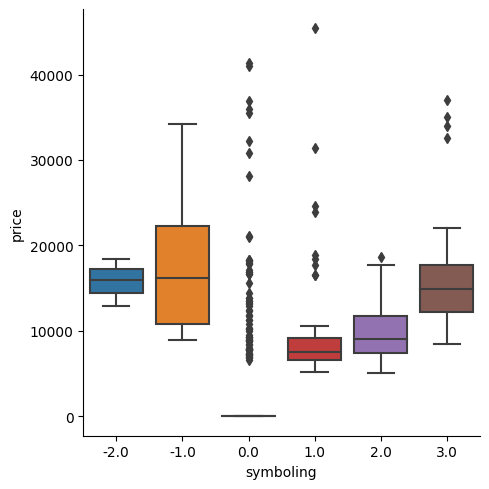

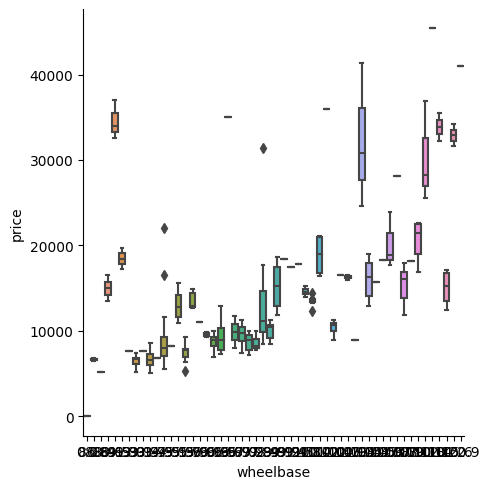

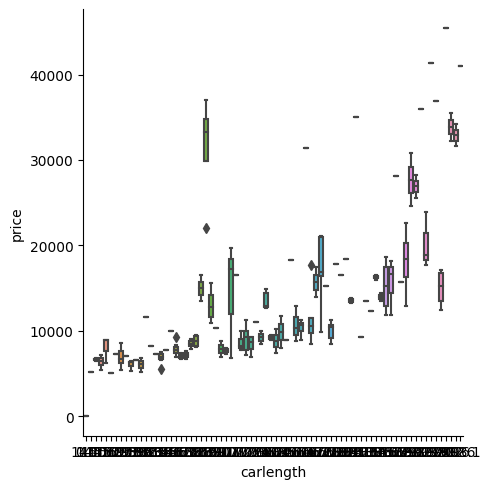

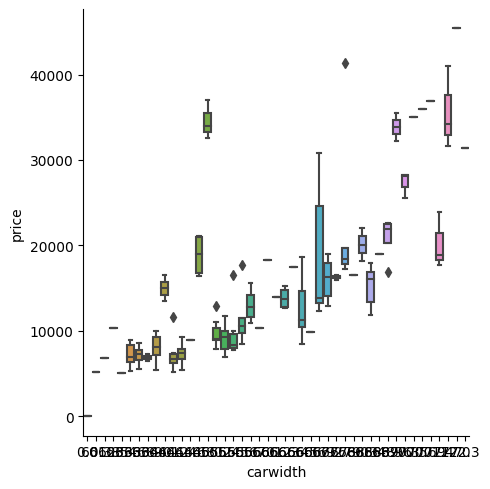

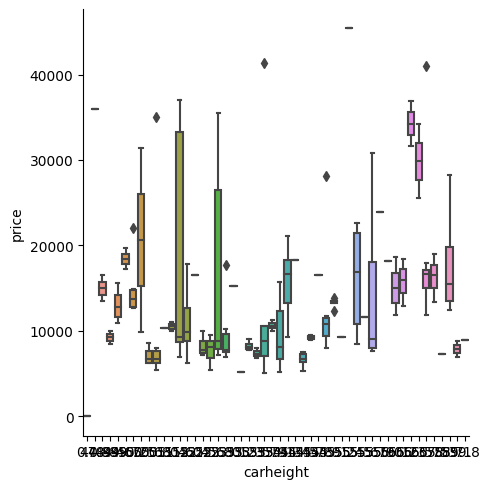

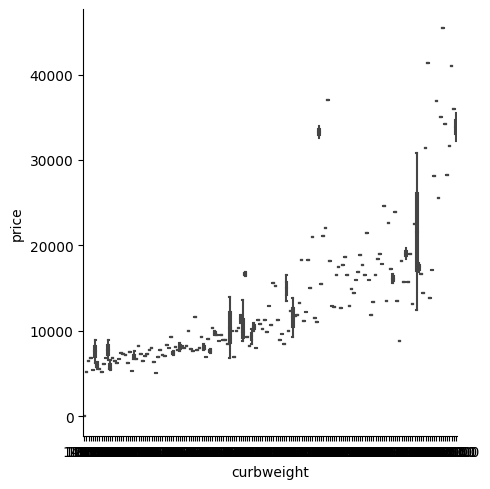

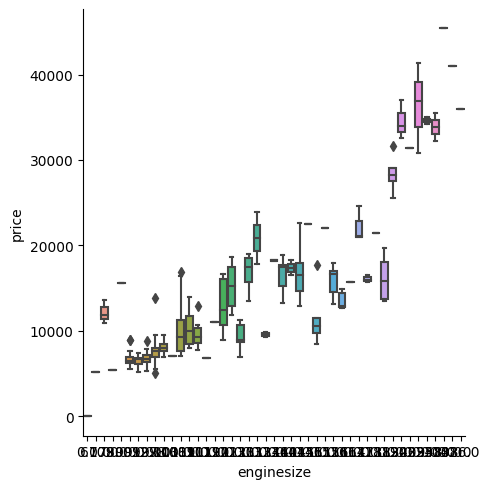

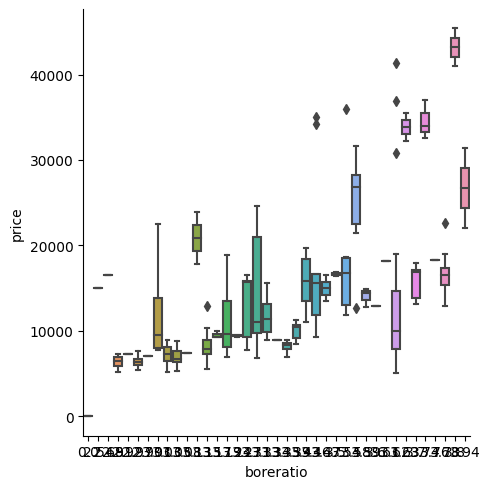

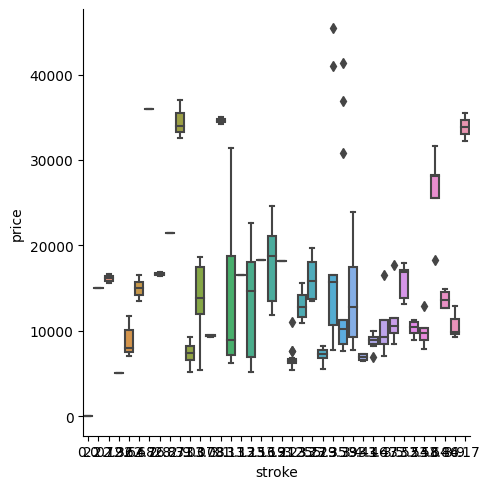

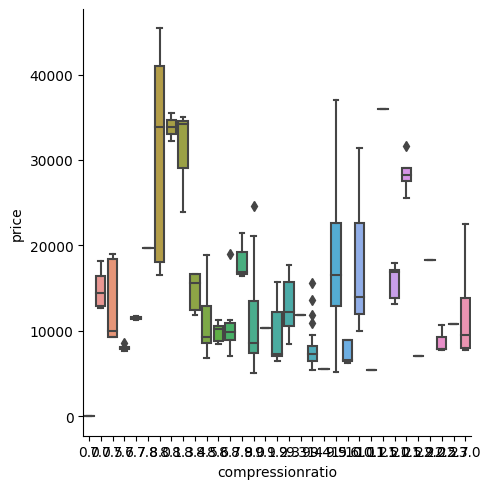

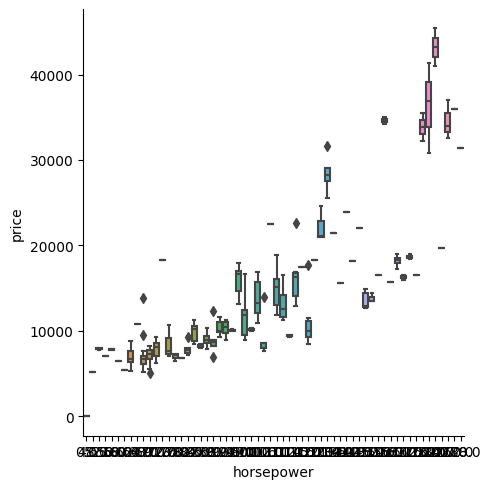

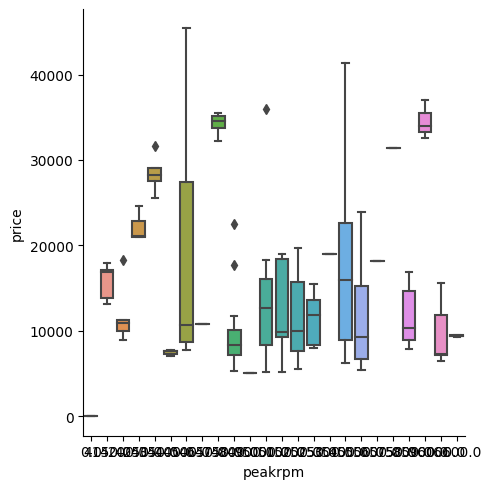

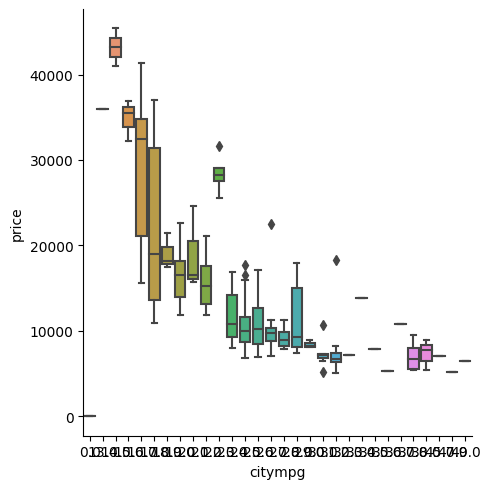

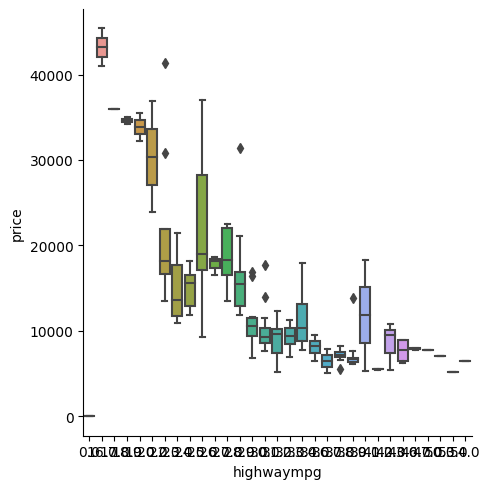

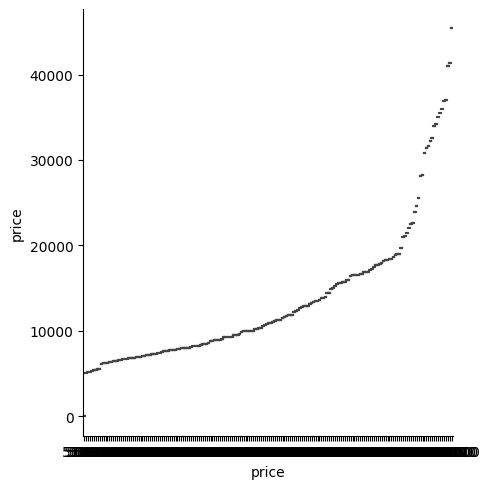

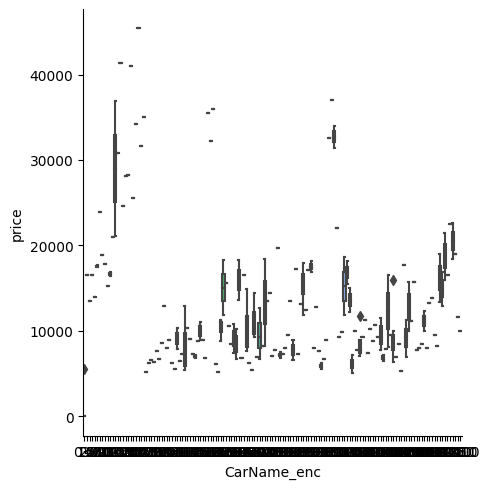

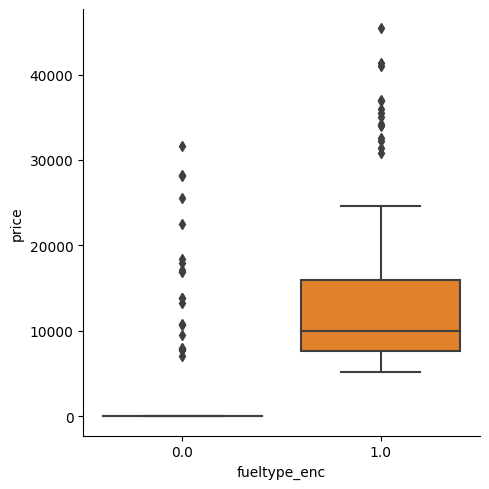

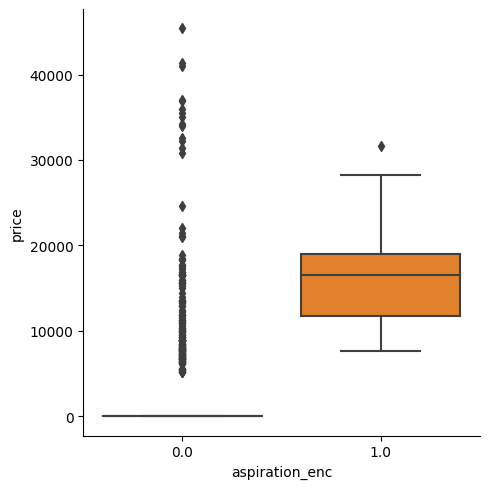

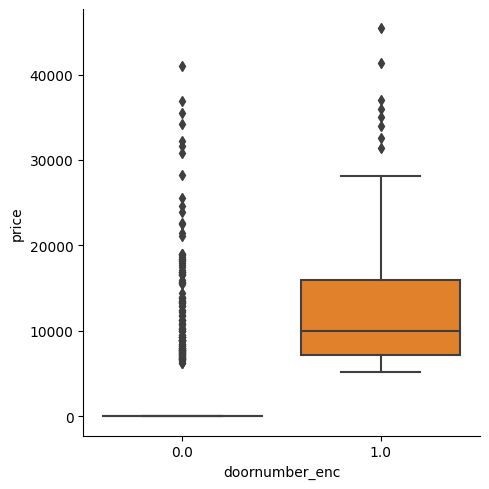

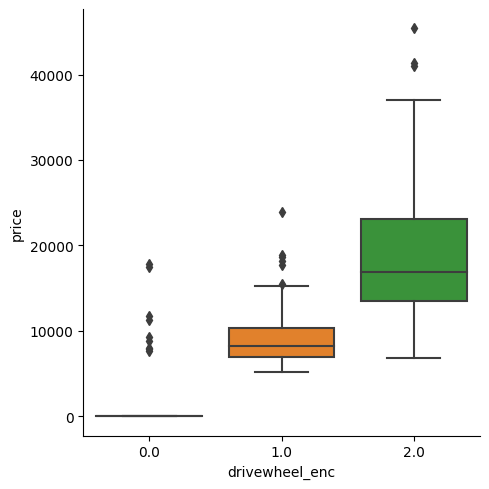

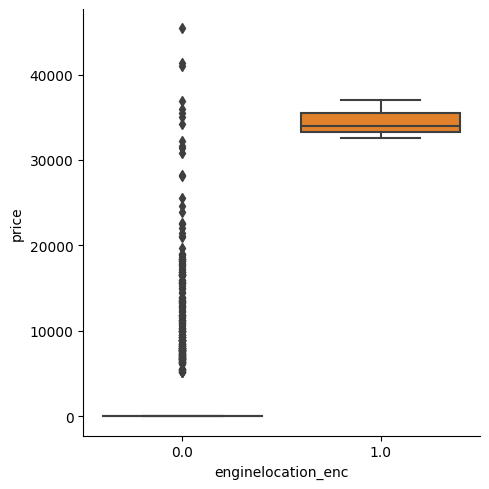

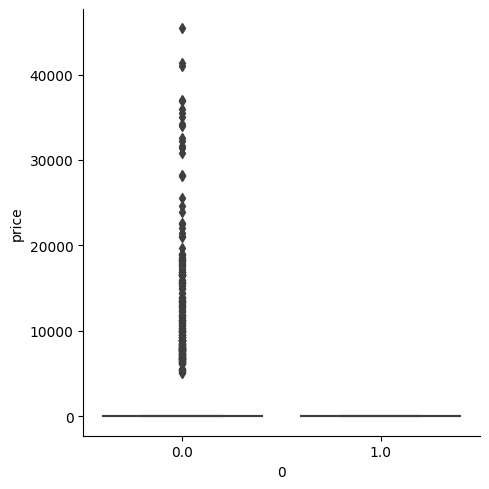

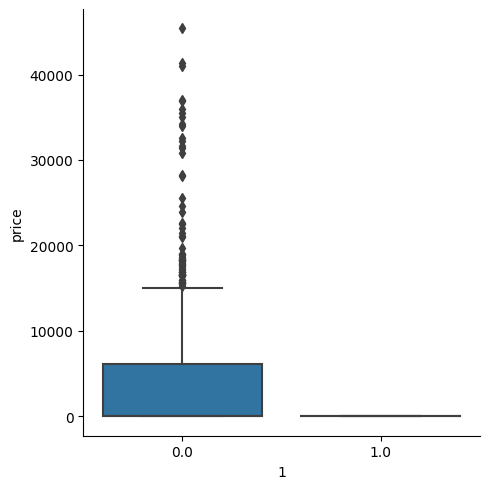

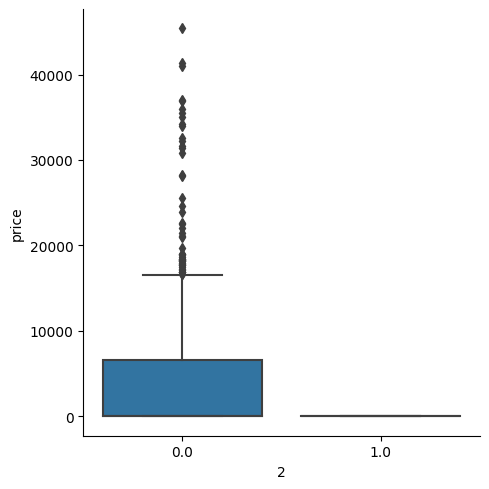

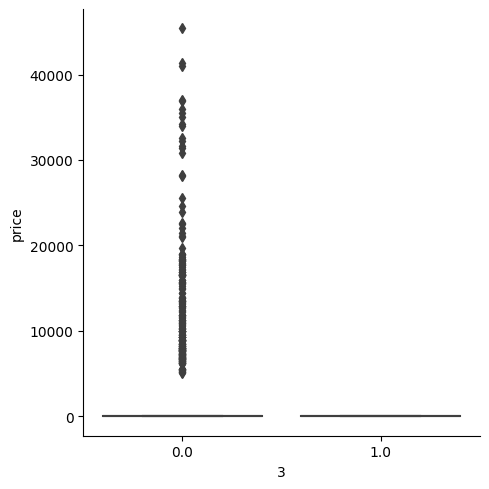

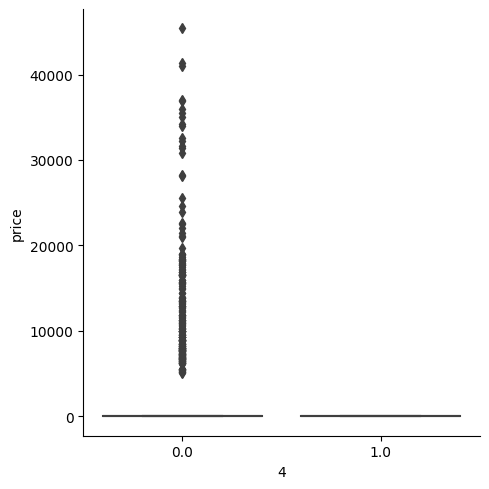

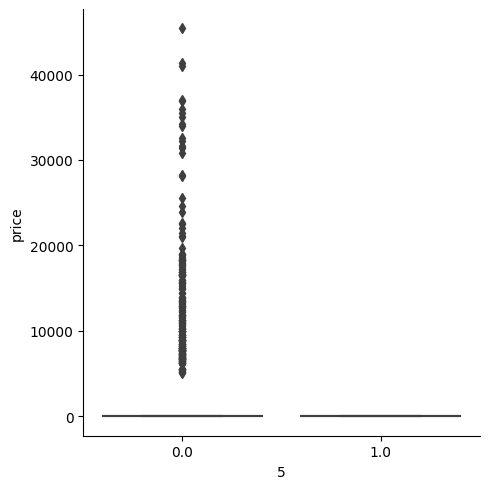

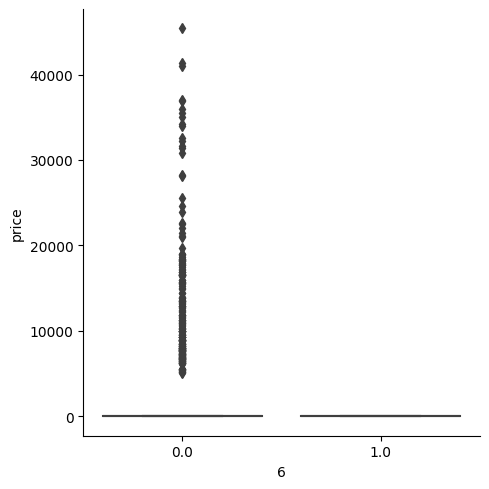

In [67]:
for value in cols:
    sns.catplot(data=final_df, x=value, y="price", kind="box")


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


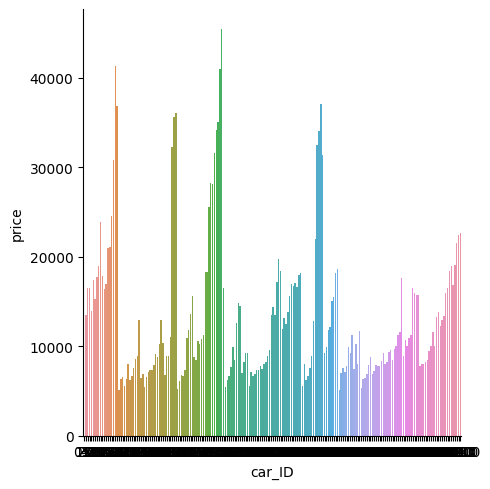

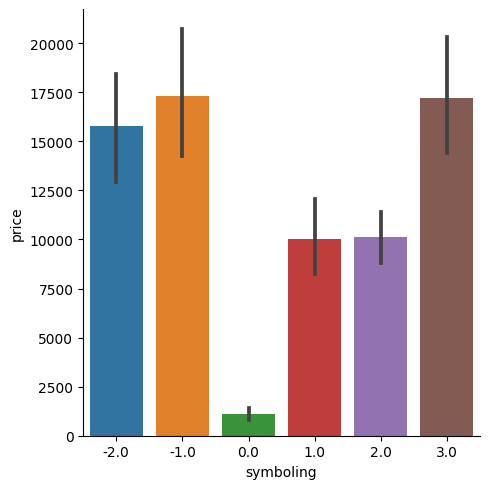

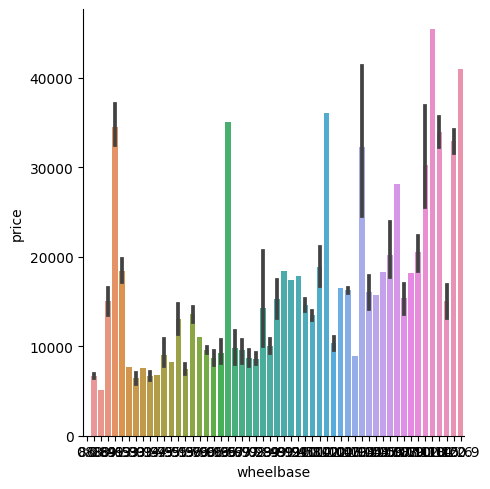

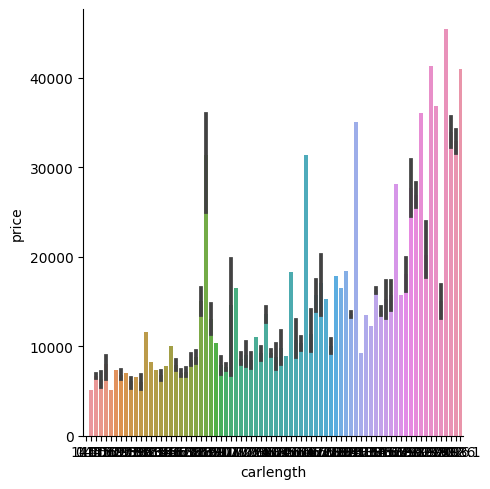

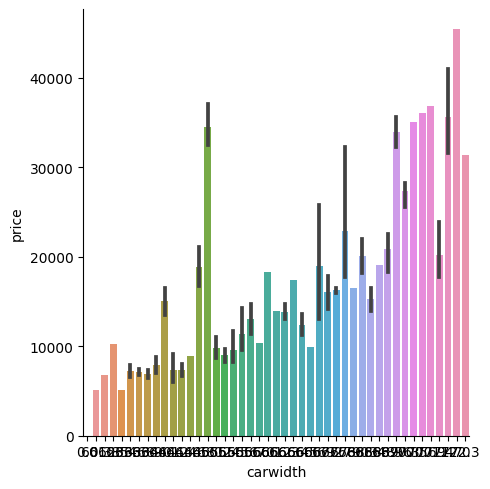

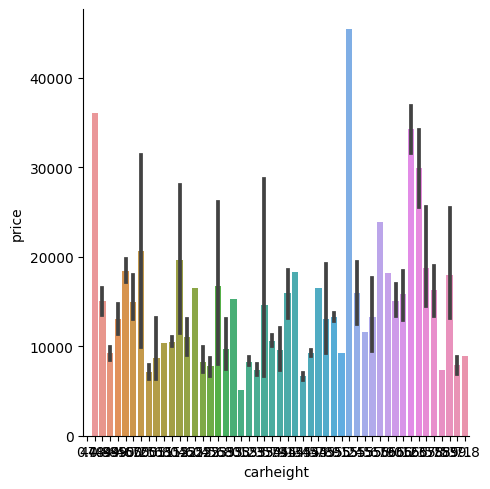

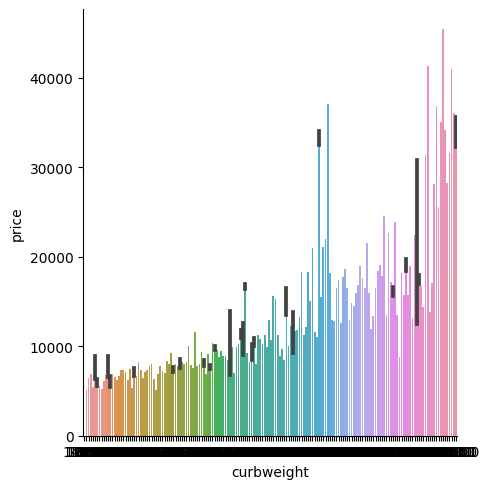

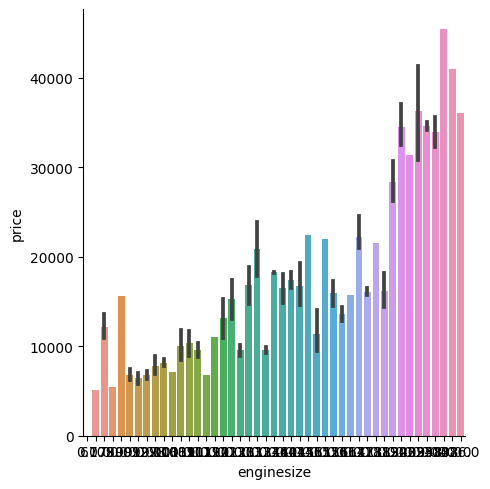

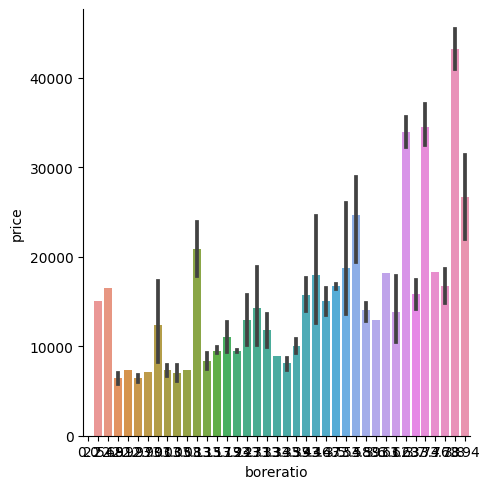

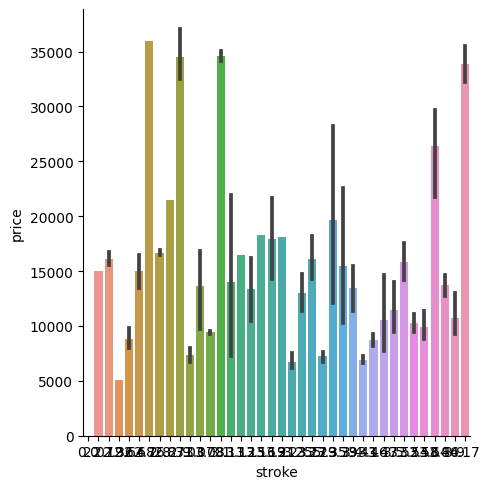

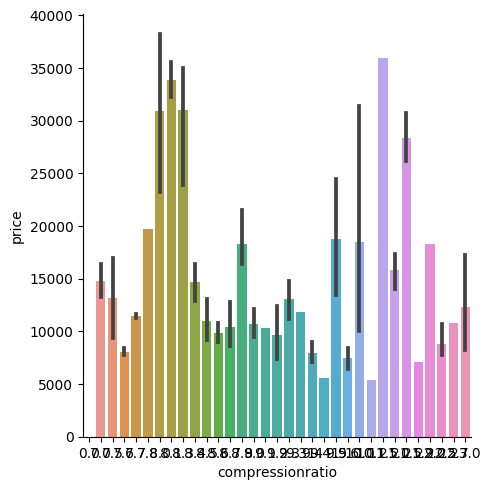

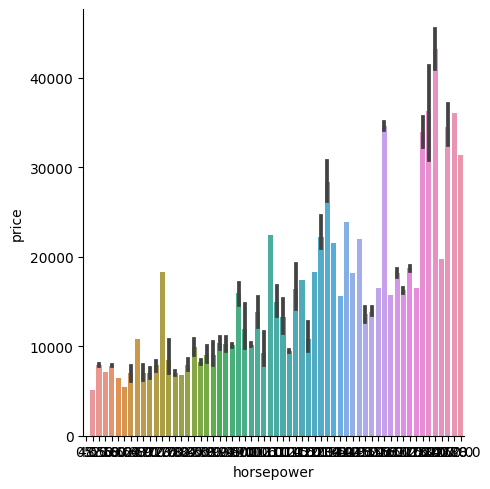

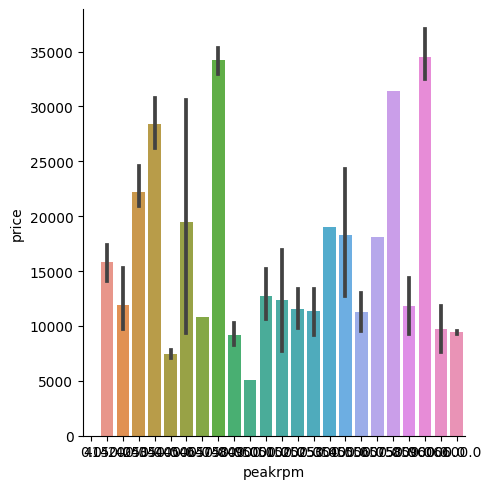

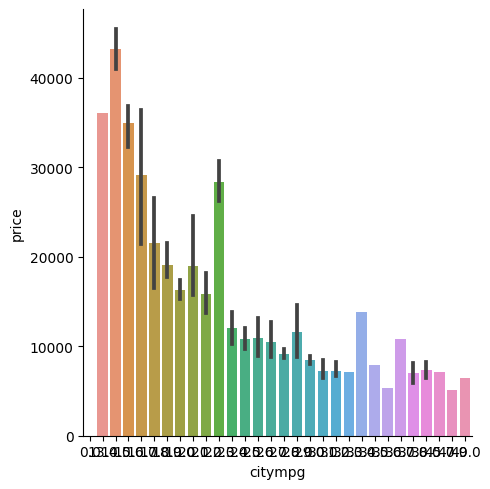

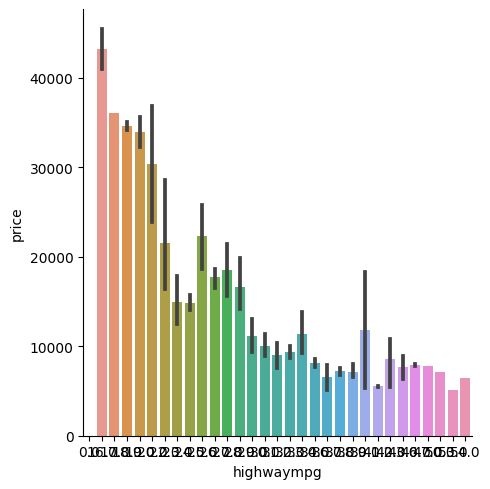

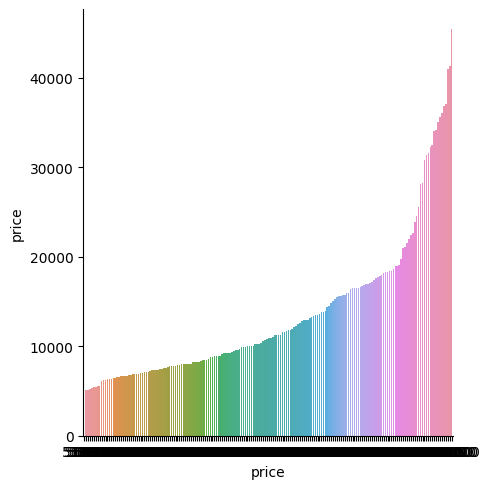

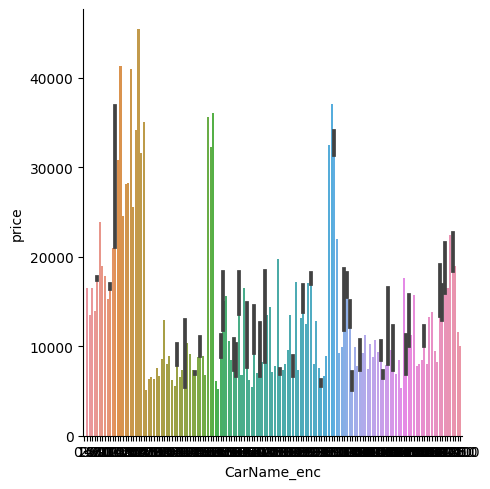

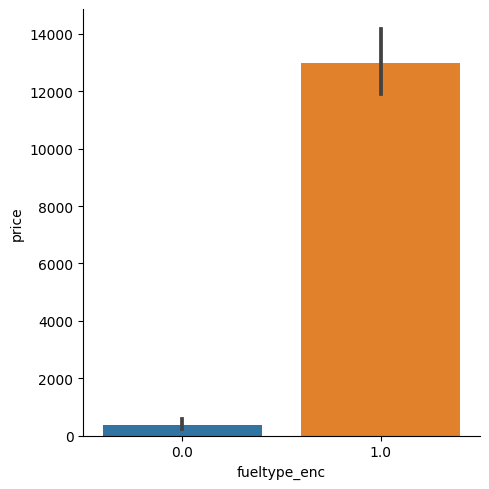

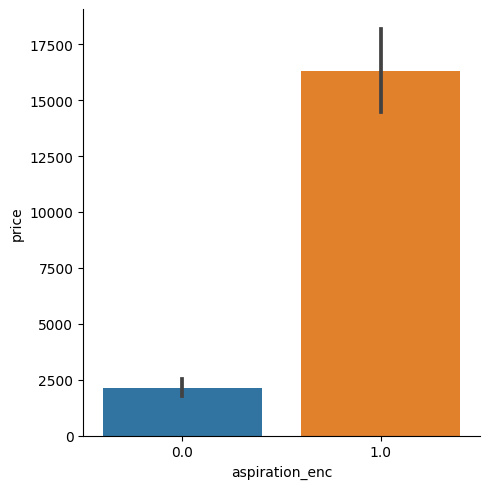

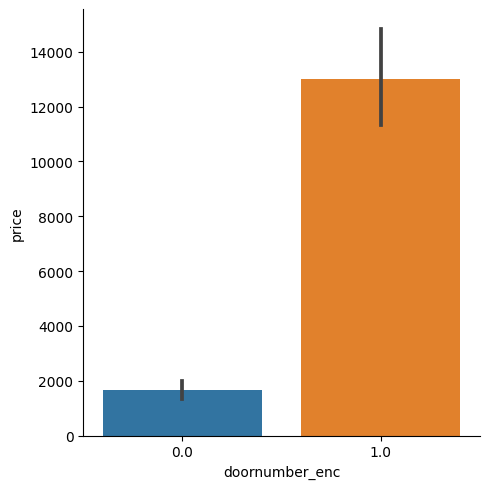

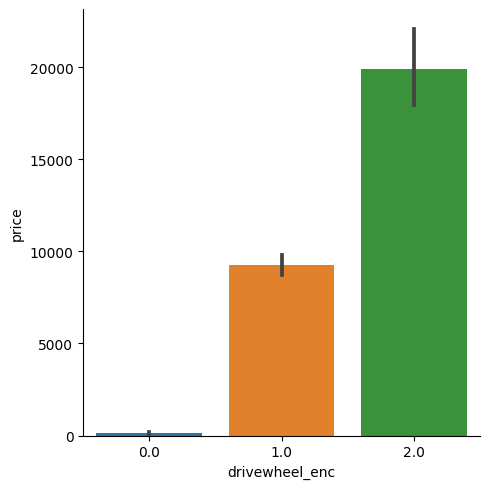

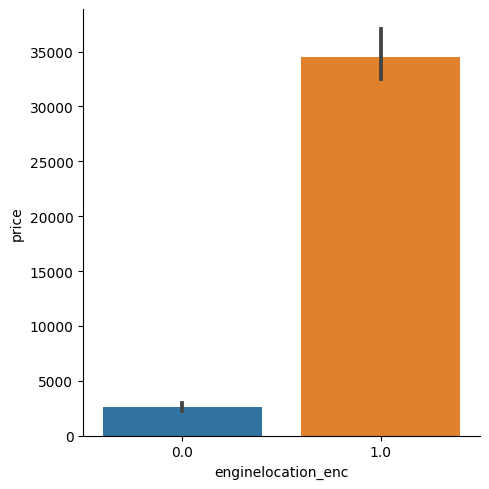

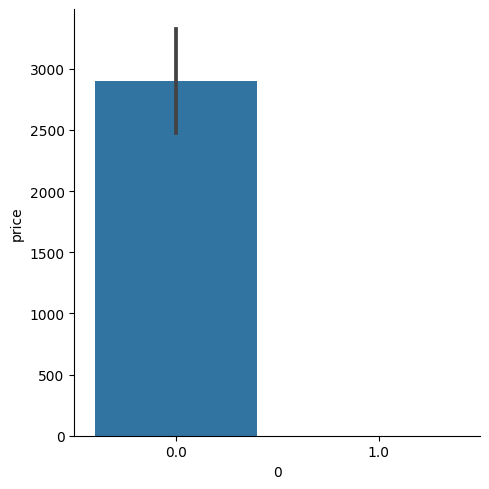

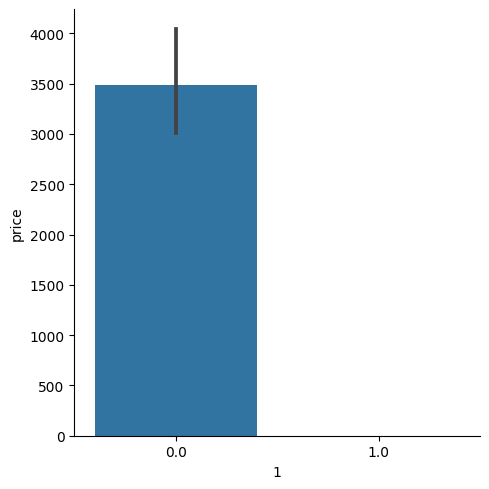

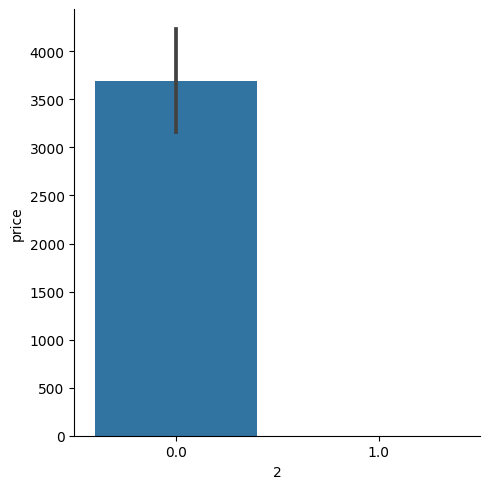

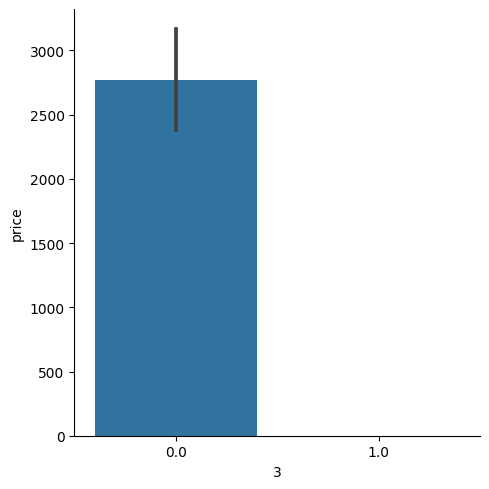

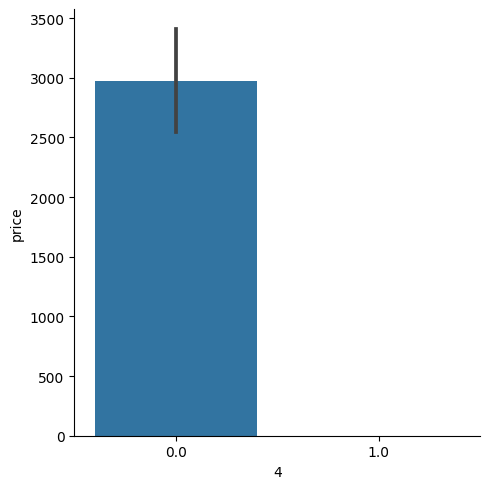

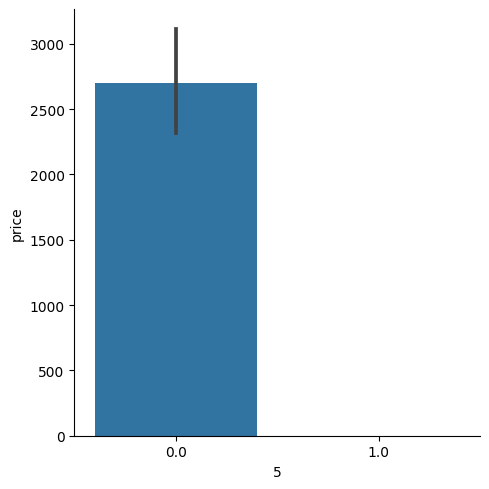

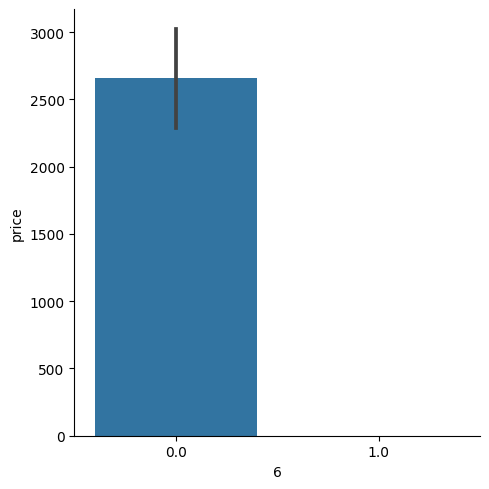

In [68]:
for value in cols:
    sns.catplot(data=final_df, x=value, y="price", kind="bar")


In [69]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025 entries, 0 to 204
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_ID              1025 non-null   float64
 1   symboling           1025 non-null   float64
 2   wheelbase           1025 non-null   float64
 3   carlength           1025 non-null   float64
 4   carwidth            1025 non-null   float64
 5   carheight           1025 non-null   float64
 6   curbweight          1025 non-null   float64
 7   enginesize          1025 non-null   float64
 8   boreratio           1025 non-null   float64
 9   stroke              1025 non-null   float64
 10  compressionratio    1025 non-null   float64
 11  horsepower          1025 non-null   float64
 12  peakrpm             1025 non-null   float64
 13  citympg             1025 non-null   float64
 14  highwaympg          1025 non-null   float64
 15  price               1025 non-null   float64
 16  CarName

In [70]:
final_df.isnull().sum()

car_ID                0
symboling             0
wheelbase             0
carlength             0
carwidth              0
carheight             0
curbweight            0
enginesize            0
boreratio             0
stroke                0
compressionratio      0
horsepower            0
peakrpm               0
citympg               0
highwaympg            0
price                 0
CarName_enc           0
fueltype_enc          0
aspiration_enc        0
doornumber_enc        0
drivewheel_enc        0
enginelocation_enc    0
0                     0
1                     0
2                     0
3                     0
4                     0
5                     0
6                     0
dtype: int64

In [71]:
final_df.isna().sum()

car_ID                0
symboling             0
wheelbase             0
carlength             0
carwidth              0
carheight             0
curbweight            0
enginesize            0
boreratio             0
stroke                0
compressionratio      0
horsepower            0
peakrpm               0
citympg               0
highwaympg            0
price                 0
CarName_enc           0
fueltype_enc          0
aspiration_enc        0
doornumber_enc        0
drivewheel_enc        0
enginelocation_enc    0
0                     0
1                     0
2                     0
3                     0
4                     0
5                     0
6                     0
dtype: int64

In [72]:
final_df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,doornumber_enc,drivewheel_enc,enginelocation_enc,0,1,2,3,4,5,6
car_ID,1.000000,0.362941,0.844188,0.846021,0.841843,0.847298,0.829072,0.783818,0.850628,0.827271,...,0.441398,0.773957,0.118831,-0.127313,-0.235140,-0.262978,-0.086957,-0.144372,-0.054633,-0.013146
symboling,0.362941,1.000000,0.482735,0.489100,0.507280,0.490704,0.458812,0.452333,0.502684,0.511117,...,0.765915,0.451281,0.236863,-0.077907,-0.143890,-0.160925,-0.053212,-0.088346,-0.033431,-0.008045
wheelbase,0.844188,0.482735,1.000000,0.999269,0.998996,0.998440,0.984566,0.950199,0.996611,0.993153,...,0.595272,0.917015,0.095443,-0.150968,-0.278829,-0.311839,-0.103114,-0.171197,-0.064783,-0.015589
carlength,0.846021,0.489100,0.999269,1.000000,0.998638,0.997570,0.987436,0.954676,0.997131,0.992276,...,0.593942,0.919284,0.104027,-0.150846,-0.278603,-0.311587,-0.103030,-0.171058,-0.064731,-0.015576
carwidth,0.841843,0.507280,0.998996,0.998638,1.000000,0.998572,0.981468,0.947639,0.997087,0.994332,...,0.614203,0.912528,0.106423,-0.151217,-0.279289,-0.312354,-0.103284,-0.171479,-0.064890,-0.015615
carheight,0.847298,0.490704,0.998440,0.997570,0.998572,1.000000,0.977206,0.939051,0.995414,0.992702,...,0.597770,0.904306,0.102870,-0.151122,-0.279114,-0.312158,-0.103219,-0.171372,-0.064849,-0.015605
curbweight,0.829072,0.458812,0.984566,0.987436,0.981468,0.977206,1.000000,0.980519,0.984135,0.973556,...,0.570781,0.937343,0.116783,-0.147555,-0.272525,-0.304789,-0.100782,-0.167326,-0.063319,-0.015237
enginesize,0.783818,0.452333,0.950199,0.954676,0.947639,0.939051,0.980519,1.000000,0.953374,0.941172,...,0.577119,0.927025,0.169005,-0.142100,-0.262449,-0.293521,-0.097056,-0.161140,-0.060978,-0.014673
boreratio,0.850628,0.502684,0.996611,0.997131,0.997087,0.995414,0.984135,0.953374,1.000000,0.989672,...,0.609518,0.920623,0.124536,-0.150698,-0.278330,-0.311281,-0.102929,-0.170890,-0.064667,-0.015561
stroke,0.827271,0.511117,0.993153,0.992276,0.994332,0.992702,0.973556,0.941172,0.989672,1.000000,...,0.617883,0.903947,0.093036,-0.150451,-0.277874,-0.310771,-0.102760,-0.170610,-0.064561,-0.015536


<AxesSubplot:>

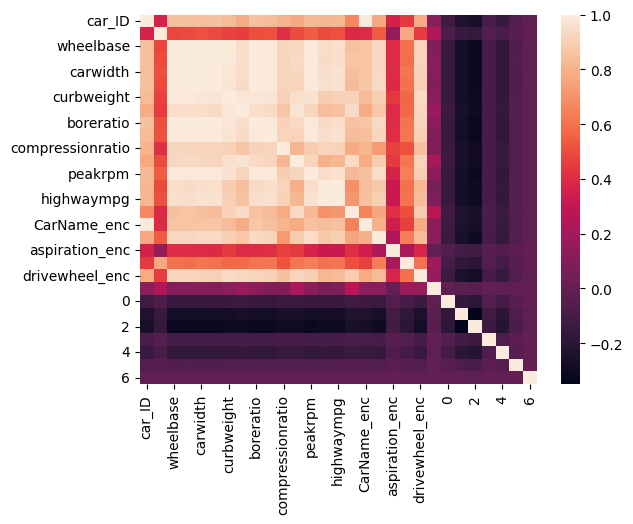

In [73]:
#correlation plot
corr = final_df.corr()
sns.heatmap(corr)

In [74]:
final_df

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,doornumber_enc,drivewheel_enc,enginelocation_enc,0,1,2,3,4,5,6
0,1.0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,2.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,2.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [100]:
x

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,doornumber_enc,drivewheel_enc,enginelocation_enc,0,1,2,3,4,5,6
0,1.0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,2.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,2.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [75]:
x=final_df.drop(['price'],axis=1)

In [76]:
y=final_df['price']

In [110]:
x

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,doornumber_enc,drivewheel_enc,enginelocation_enc,0,1,2,3,4,5,6
0,1.0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,2.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,2.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [78]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200        0.0
201        0.0
202        0.0
203        0.0
204        0.0
Name: price, Length: 1025, dtype: float64

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pickle

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [81]:
x_train,x_test,y_train,y_test

(     car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
 200     0.0        0.0        0.0        0.0       0.0        0.0         0.0   
 69      0.0        0.0        0.0        0.0       0.0        0.0         0.0   
 22      0.0        0.0        0.0        0.0       0.0        0.0         0.0   
 90      0.0        0.0        0.0        0.0       0.0        0.0         0.0   
 157     0.0        0.0        0.0        0.0       0.0        0.0         0.0   
 ..      ...        ...        ...        ...       ...        ...         ...   
 85      0.0        0.0        0.0        0.0       0.0        0.0         0.0   
 71     72.0       -1.0      115.6      202.6      71.7       56.5      3740.0   
 106   107.0        1.0       99.2      178.5      67.9       49.7      3139.0   
 65      0.0        0.0        0.0        0.0       0.0        0.0         0.0   
 40      0.0        0.0        0.0        0.0       0.0        0.0         0.0   
 
      enginesi

In [82]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((717, 28), (308, 28), (717,), (308,))

In [83]:
re=LinearRegression()

In [84]:
re_train=re.fit(x_train,y_train)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [85]:
pred=re_train.predict(x_test)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [86]:
pred,y_test

(array([ 2.58637556e-12, -2.45137244e-13,  8.17124146e-13,  6.81721174e+03,
        -4.95958830e-12, -2.75494639e+01, -4.95958830e-12,  2.58637556e-12,
         6.66838665e+03,  1.02637898e-11,  8.17124146e-13,  2.76636652e+04,
         2.58637556e-12,  2.16034125e+04, -4.95958830e-12,  2.58637556e-12,
         2.58637556e-12,  2.58637556e-12,  1.02637898e-11,  1.01532598e+04,
         6.19414284e+03,  1.02637898e-11,  8.17124146e-13,  8.17124146e-13,
         8.17124146e-13,  8.17124146e-13,  2.58637556e-12,  8.17124146e-13,
         8.17124146e-13,  1.47082346e-12,  1.47082346e-12,  8.17124146e-13,
         8.17124146e-13,  2.58637556e-12,  1.02637898e-11,  2.58637556e-12,
         8.17124146e-13,  8.17124146e-13,  8.17124146e-13, -2.45137244e-13,
        -2.75494639e+01, -2.45137244e-13,  2.58637556e-12,  8.17124146e-13,
         2.58637556e-12,  1.02637898e-11,  2.58637556e-12, -2.45137244e-13,
         2.58637556e-12,  8.17124146e-13,  8.17124146e-13, -4.95958830e-12,
         1.1

In [87]:
r2_score(y_test,pred)*100

94.45235964925025

In [88]:
y_test[112:115]

100     9549.0
88      9279.0
63     10795.0
Name: price, dtype: float64

In [89]:
re_train.predict(x_test[112:115])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([10474.70351732, 12846.34730721, 12437.29623206])

In [90]:
y_test[110:130]

133        0.0
139        0.0
100     9549.0
88      9279.0
63     10795.0
28         0.0
73         0.0
139     7053.0
193        0.0
5          0.0
132        0.0
84         0.0
179        0.0
109    12440.0
142        0.0
42         0.0
102        0.0
82         0.0
76         0.0
136    18150.0
Name: price, dtype: float64

In [91]:
re_train.predict(x_test[110:130])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([ 8.17124146e-13,  2.58637556e-12,  1.04747035e+04,  1.28463473e+04,
        1.24372962e+04, -4.95958830e-12,  1.02637898e-11,  7.86691934e+03,
        8.17124146e-13, -4.95958830e-12,  8.17124146e-13,  8.17124146e-13,
       -2.75494639e+01,  1.71345499e+04, -4.95958830e-12,  8.17124146e-13,
        1.02637898e-11,  2.58637556e-12,  8.17124146e-13,  1.31315093e+04])

In [94]:
pickle.dump(re_train, open('car_prediction.pkl', 'wb'))

In [95]:
pickled_model = pickle.load(open('car_prediction.pkl', 'rb'))

In [97]:
pickled_model.predict(x_test)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([ 2.58637556e-12, -2.45137244e-13,  8.17124146e-13,  6.81721174e+03,
       -4.95958830e-12, -2.75494639e+01, -4.95958830e-12,  2.58637556e-12,
        6.66838665e+03,  1.02637898e-11,  8.17124146e-13,  2.76636652e+04,
        2.58637556e-12,  2.16034125e+04, -4.95958830e-12,  2.58637556e-12,
        2.58637556e-12,  2.58637556e-12,  1.02637898e-11,  1.01532598e+04,
        6.19414284e+03,  1.02637898e-11,  8.17124146e-13,  8.17124146e-13,
        8.17124146e-13,  8.17124146e-13,  2.58637556e-12,  8.17124146e-13,
        8.17124146e-13,  1.47082346e-12,  1.47082346e-12,  8.17124146e-13,
        8.17124146e-13,  2.58637556e-12,  1.02637898e-11,  2.58637556e-12,
        8.17124146e-13,  8.17124146e-13,  8.17124146e-13, -2.45137244e-13,
       -2.75494639e+01, -2.45137244e-13,  2.58637556e-12,  8.17124146e-13,
        2.58637556e-12,  1.02637898e-11,  2.58637556e-12, -2.45137244e-13,
        2.58637556e-12,  8.17124146e-13,  8.17124146e-13, -4.95958830e-12,
        1.11295460e+04,  

In [120]:
car_ID=1.0
symboling=3.0
wheelbase=88.6
carlength=168.8
carwidth=64.1
carheight=48.8
curbweight=2548.0
enginesize=130.0
boreratio=3.47
stroke=2.68
compressionratio=9.0
horsepower=111.0
peakrpm=5000.0
citympg=21.0
highwaympg=27.0
CarName_enc=2.0
fueltype_enc=1.0
aspiration_enc=0.0
doornumber_enc=1.0
drivewheel_enc=2.0
enginelocation_enc=0.0
a0=0.0
a1=0.0
a2=0.0
a3=0.0
a4=0.0
a5=0.0
a6=0.0

In [121]:
pr=[car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarName_enc,fueltype_enc,aspiration_enc,doornumber_enc,drivewheel_enc,enginelocation_enc,a0,a1,a2,a3,a4,a5,a6]

In [123]:
pickled_model.predict([pr])

array([16012.00674498])

In [92]:
#outliers,scaling,carname,pickel,skew

In [124]:
y[0]

0    13495.0
0        0.0
0        0.0
0        0.0
0        0.0
Name: price, dtype: float64